In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

import sys
sys.path.append('/home/albert/github/tensorflow/src/')
import evaluation

Using TensorFlow backend.


In [2]:
tensorflow_root = '/home/albert/github/tensorflow/models/'
model_root = 'densenet_triplet_margin_preprocess'
train_score = np.load(tensorflow_root + '%s/%s_score.npz' % (model_root, model_root))['arr_0'].item()
test_score = np.load(tensorflow_root + '%s/%s_test_score.npz' % (model_root, model_root))['arr_0'].item()

In [3]:
train_rank1_avg = []
train_rank5_avg = []
train_rank20_avg = []
test_rank1_avg = []
test_rank5_avg = []
test_rank20_avg = []

iterations = 20000

for it in range(1000, iterations + 1000, 1000):
    train_rank1_avg.append(np.average(np.array(train_score['rank1'][it])))
    train_rank5_avg.append(np.average(np.array(train_score['rank5'][it])))
    train_rank20_avg.append(np.average(np.array(train_score['rank20'][it])))
    test_rank1_avg.append(np.average(np.array(test_score['rank1'][it])))
    test_rank5_avg.append(np.average(np.array(test_score['rank5'][it])))
    test_rank20_avg.append(np.average(np.array(test_score['rank20'][it])))

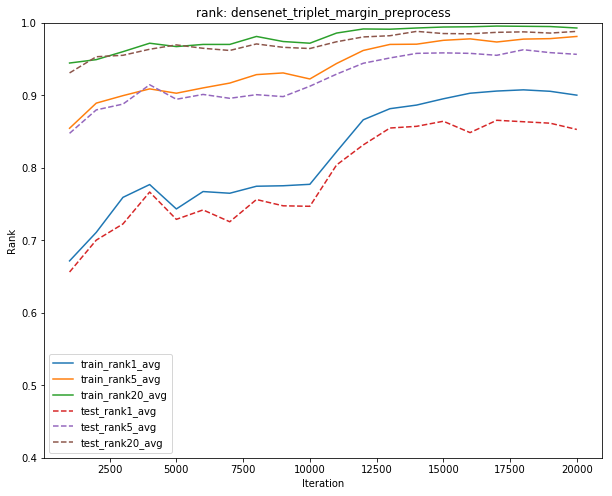

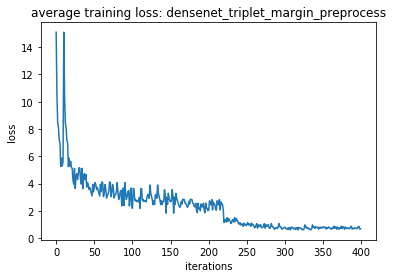

17
best_train {1: 0.90600000000000003, 20: 0.9956666666666667, 5: 0.97366666666666657}
best_test {1: 0.8656666666666667, 20: 0.98699999999999999, 5: 0.95533333333333326}


In [4]:
plt.figure(figsize=(10,8))
plt.plot(np.arange(1000,iterations+1000,1000), train_rank1_avg, label='train_rank1_avg', )
plt.plot(np.arange(1000,iterations+1000,1000), train_rank5_avg, label='train_rank5_avg', )
plt.plot(np.arange(1000,iterations+1000,1000), train_rank20_avg, label='train_rank20_avg')

plt.plot(np.arange(1000,iterations+1000,1000), test_rank1_avg, label='test_rank1_avg', linestyle='--')
plt.plot(np.arange(1000,iterations+1000,1000), test_rank5_avg, label='test_rank5_avg', linestyle='--')
plt.plot(np.arange(1000,iterations+1000,1000), test_rank20_avg, label='test_rank20_avg', linestyle='--')
plt.legend(loc='lower left')
plt.xlabel('Iteration')
plt.ylabel('Rank')
plt.title('rank: %s' % model_root)
plt.xlabel('Iteration')
plt.ylabel('Rank')
plt.ylim(0.4,1.0)
plt.show()

# Note this loss is the average training loss over 16 input images
loss = []
plt.plot(train_score['loss'])
plt.title('average training loss: %s' % model_root)
plt.xlabel('iterations')
plt.ylabel('loss')
plt.show()

m = np.array(test_rank1_avg).argmax()
print m + 1
best_train = {1:train_rank1_avg[m], 5:train_rank5_avg[m], 20:train_rank20_avg[m]}
best_test = {1:test_rank1_avg[m], 5:test_rank5_avg[m], 20:test_rank20_avg[m]}
print 'best_train' , best_train
print 'best_test' , best_test

In [16]:
evaluation.plot_rank('densenet_triplet_front_vanilla')

IOError: [Errno 2] No such file or directory: '/home/albert/github/tensorflow/models/densenet_triplet_front_vanilla/densenet_triplet_front_vanilla_score.npz'

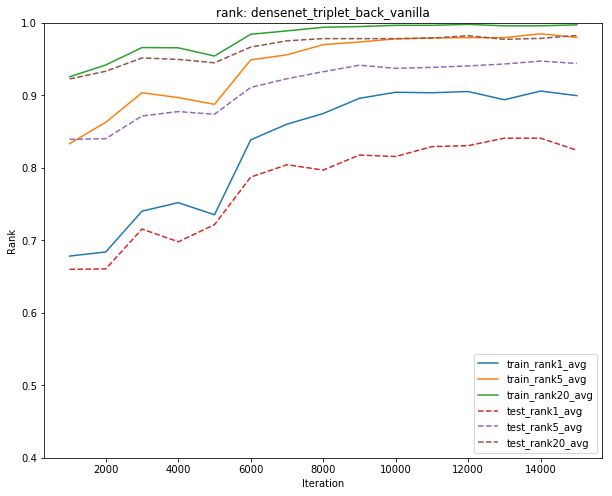

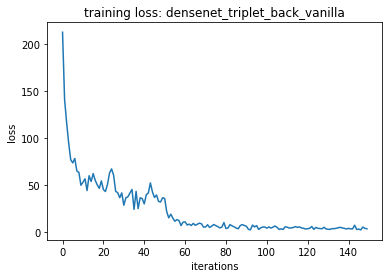

13
best_train {1: 0.89400000000000002, 20: 0.996, 5: 0.97966666666666669}
best_test {1: 0.84099999999999986, 20: 0.97733333333333328, 5: 0.94333333333333325}


In [7]:
plot_rank('densenet_triplet_back_vanilla')

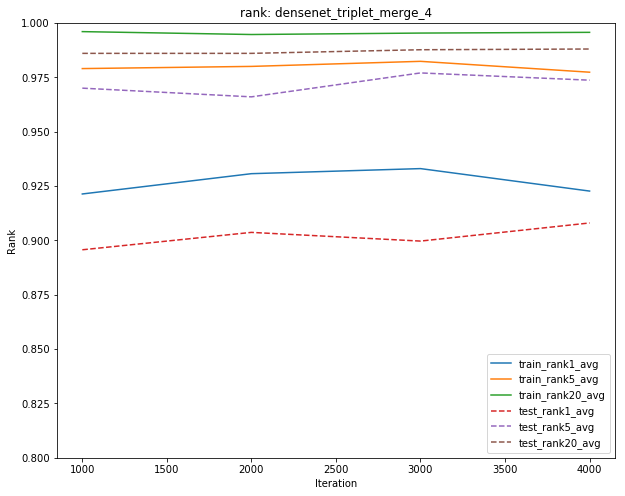

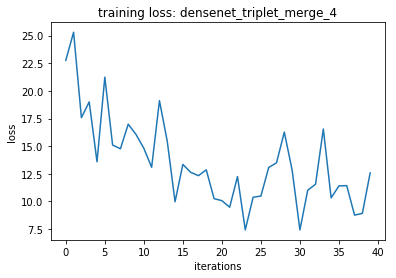

4
best_train {1: 0.92266666666666675, 20: 0.9956666666666667, 5: 0.97733333333333328}
best_test {1: 0.90800000000000003, 20: 0.98799999999999999, 5: 0.97366666666666679}


In [8]:
plot_rank('densenet_triplet_merge_4', ylim_0=0.8, ylim_1=1.0)

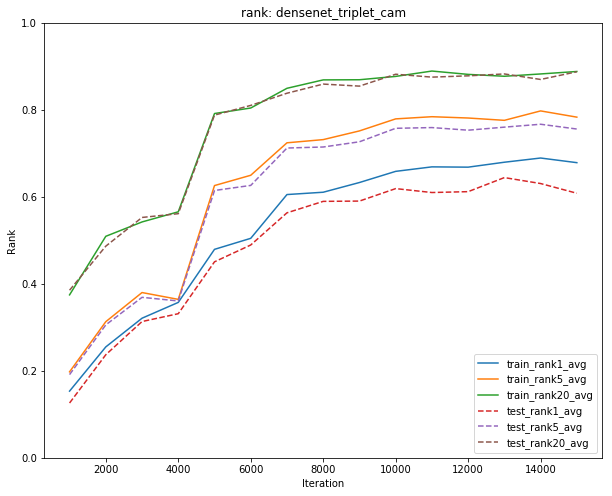

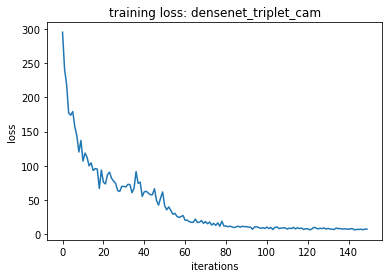

13
best_train {1: 0.67966666666666653, 20: 0.87733333333333341, 5: 0.77600000000000013}
best_test {1: 0.64433333333333331, 20: 0.88266666666666671, 5: 0.76033333333333342}


In [9]:
plot_rank('densenet_triplet_cam', ylim_0=0.0, ylim_1=1.0)

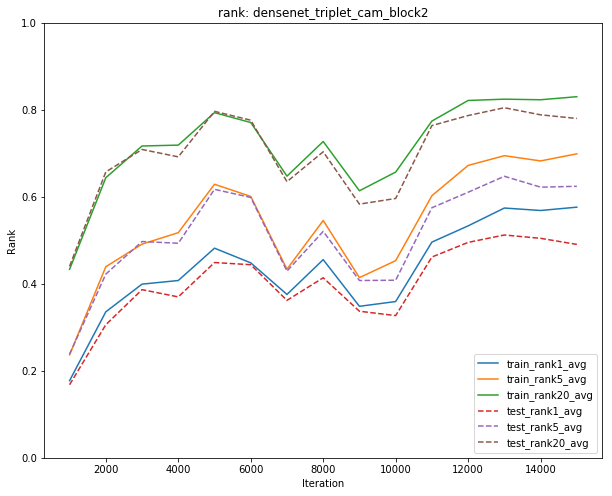

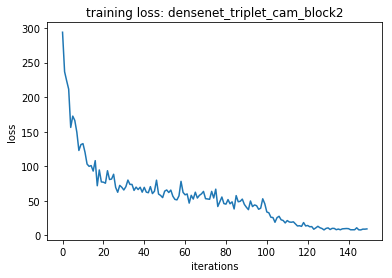

13
best_train {1: 0.57433333333333325, 20: 0.82466666666666677, 5: 0.69466666666666654}
best_test {1: 0.51233333333333342, 20: 0.80500000000000005, 5: 0.64733333333333343}


In [10]:
plot_rank('densenet_triplet_cam_block2', ylim_0=0.0, ylim_1=1.0)

In [2]:
evaluation.plot_rank('densenet_triplet_soft_margin', ylim_0=0.0, ylim_1=1.0, end_2=False)

['pos_distance', 5000, 'rank', 10000, 15000, 4000, 9000, 14000, 3000, 8000, 13000, 'precision', 2000, 'neg_distance', 7000, 12000, 'loss', 1000, 'recall', 'matt_coef', 6000, 11000]


ValueError: invalid literal for long() with base 10: 'pos_distance'